In [2]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [6]:
train=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Train.csv')
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [7]:
test=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Test.csv')
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


# Data Inspection

In [8]:
train.shape,test.shape

((8523, 12), (5681, 11))

 Above we have 8523 rows and 12 columns in Train set whereas Test set has 5681 rows and 11 columns.

In [9]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [10]:
train.isnull().sum()/train.shape[0] *100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

 17% and 28% of missing values in Item weight and Outlet_Size columns respectively.

In [11]:
test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [12]:
test.isnull().sum()/test.shape[0] *100

Item_Identifier               0.000000
Item_Weight                  17.180074
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.269671
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
dtype: float64

Same missing values percentage of Item_Weight and Outlet_Size columns as that of in Test set.

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Information about train dataset.

In [15]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


Information about test dataset.

In [14]:
categorical = train.select_dtypes(include =[np.object])
print("Categorical Features in Train Set:",categorical.shape[1])

numerical= train.select_dtypes(include =[np.float64,np.int64])
print("Numerical Features in Train Set:",numerical.shape[1])

Categorical Features in Train Set: 7
Numerical Features in Train Set: 5


In [17]:
categorical = test.select_dtypes(include =[np.object])
print("Categorical Features in Test Set:",categorical.shape[1])

numerical= test.select_dtypes(include =[np.float64,np.int64])
print("Numerical Features in Test Set:",numerical.shape[1])

Categorical Features in Test Set: 7
Numerical Features in Test Set: 4


In [18]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [19]:
test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


# Imputing Missing Value

In [20]:
#Item_Weight
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [22]:
test.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [23]:
train['Item_Weight'].isnull().sum(),test['Item_Weight'].isnull().sum()

(1463, 976)

<AxesSubplot:xlabel='Item_Weight'>

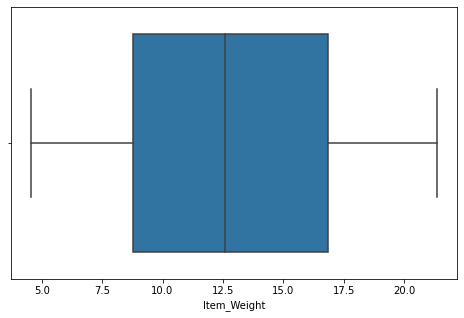

In [25]:
plt.figure(figsize=(8,5))
sn.boxplot('Item_Weight',data=train)

<AxesSubplot:xlabel='Item_Weight'>

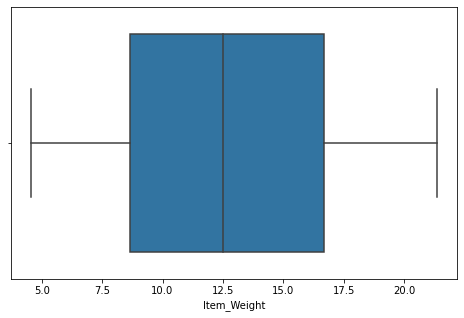

In [26]:
plt.figure(figsize=(8,5))
sn.boxplot('Item_Weight',data=test)

The Box Plots above clearly show no "Outliers" and hence we can impute the missing values with "Mean"

train['Item_Weight']= train['Item_Weight'].fillna(train['Item_Weight'].mean())
test['Item_Weight']= test['Item_Weight'].fillna(test['Item_Weight'].mean())

In [28]:
train['Item_Weight'].isnull().sum(),test['Item_Weight'].isnull().sum()


(0, 0)

We have succesfully imputed the missing values from the column Item_Weight.

In [30]:
# Outlet Size
train['Outlet_Size'].isnull().sum(),test['Outlet_Size'].isnull().sum()


(2410, 1606)

In [31]:
print(train['Outlet_Size'].value_counts())
print('__________________________________')
print(test['Outlet_Size'].value_counts())

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64
__________________________________
Medium    1862
Small     1592
High       621
Name: Outlet_Size, dtype: int64


Since the Outlet_Size is a Categorical column, we can impute the missing values by "Mode"(Most Repeated Value) from the column.

In [32]:
train['Outlet_Size']= train['Outlet_Size'].fillna(train['Outlet_Size'].mode()[0])
test['Outlet_Size']= test['Outlet_Size'].fillna(test['Outlet_Size'].mode()[0])


In [33]:
train['Outlet_Size'].isnull().sum(),test['Outlet_Size'].isnull().sum()


(0, 0)

We have succesfully imputed the missing values from the column Outlet_Size.

# Data Cleaning

In [35]:
train.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [38]:
train['Item_Identifier'].value_counts()

FDG33    10
FDW13    10
NCI54     9
FDW49     9
FDG09     9
         ..
FDO33     1
FDC23     1
FDE52     1
FDY43     1
FDT35     1
Name: Item_Identifier, Length: 1559, dtype: int64

In [36]:
train['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Some of 'Low Fat' values mis-coded as 'low fat' and 'LF'. Also, some of 'Regular' are mentioned as 'reg'.We need to fix them.



In [37]:
train['Item_Fat_Content'].replace(['low fat','LF','reg'],['Low Fat','Low Fat','Regular'],inplace = True)
test['Item_Fat_Content'].replace(['low fat','LF','reg'],['Low Fat','Low Fat','Regular'],inplace = True)


In [39]:
train['Item_Fat_Content']= train['Item_Fat_Content'].astype(str)

In [40]:
train['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [41]:
train['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [42]:
train['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT049    930
OUT035    930
OUT046    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [44]:
train['Outlet_Size'].value_counts()

Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64

train['Outlet_Location_Type'].value_counts()

In [46]:
train['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [47]:
train['Years_Established'] = train['Outlet_Establishment_Year'].apply(lambda x: 2021 - x) 
test['Years_Established'] = test['Outlet_Establishment_Year'].apply(lambda x: 2021 - x)

We will convert "Outlet_Establishment_Year" to the Age of the store to get more meaning from the data

In [48]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Years_Established
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,22
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,12
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,22
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,23
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,34


# Exploratory Data Analysis

# Univariate Analysis


<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

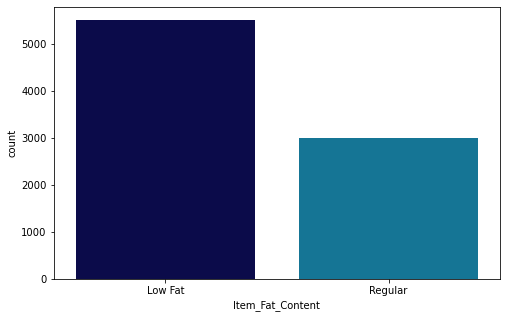

In [50]:
# Item_Fat_Content
plt.figure(figsize=(8,5))
sn.countplot('Item_Fat_Content',data=train,palette='ocean') 

The Items bought are more of Low Fat.

<AxesSubplot:xlabel='Item_Type', ylabel='count'>

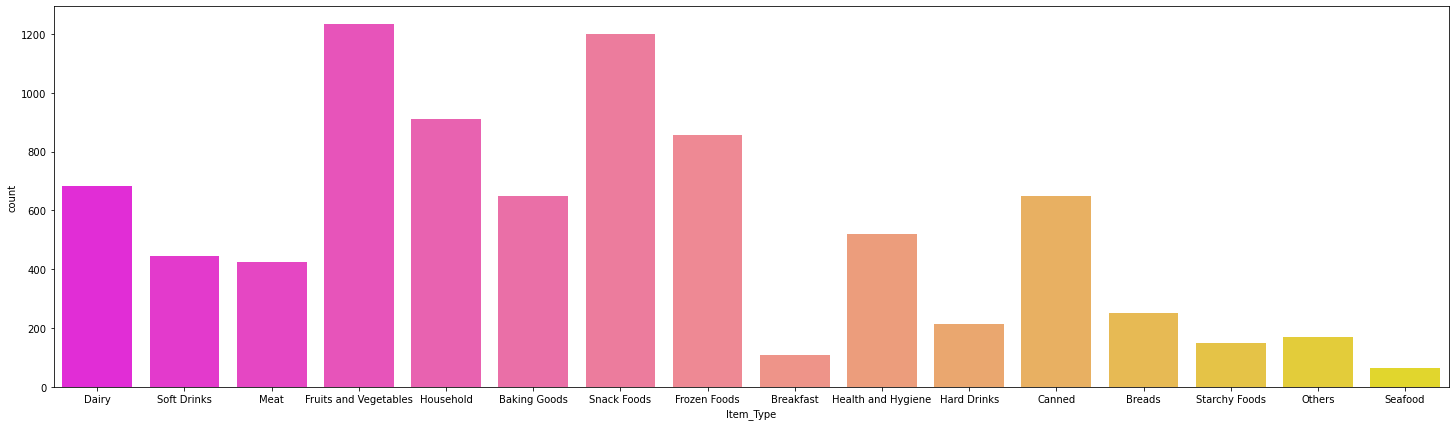

In [52]:
# Item Type
plt.figure(figsize=(25,7))
sn.countplot('Item_Type',data=train,palette='spring')

Fruits and Vegetables are largely sold as people tend to use them on daily purpose.
Snack Foods too have good sales.

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

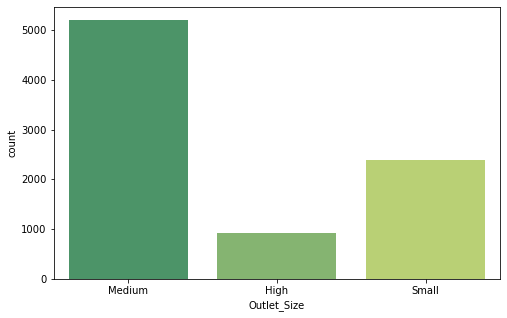

In [53]:
# Outlet_Size
plt.figure(figsize=(8,5))
sn.countplot('Outlet_Size',data=train,palette='summer') 

The Outlets are more of Medium Size

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

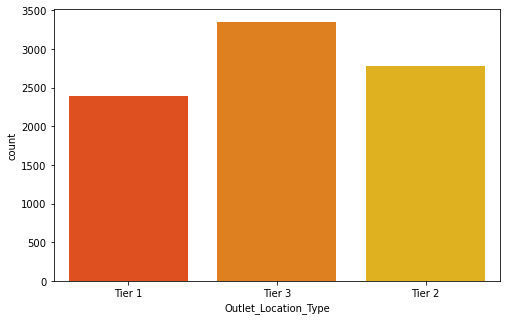

In [55]:
# Outlet Location Type
plt.figure(figsize=(8,5))
sn.countplot('Outlet_Location_Type',data=train,palette='autumn') 

The Outlets are maximum in number in Tier 3 Cities.

<AxesSubplot:xlabel='Outlet_Type', ylabel='count'>

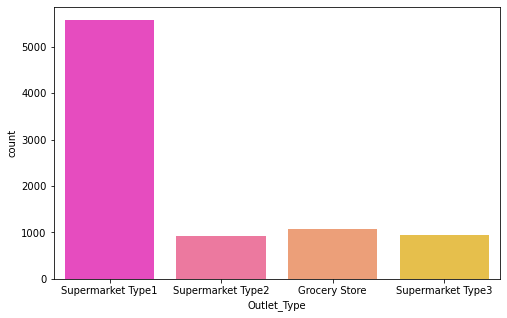

In [61]:
# Outlet Type
plt.figure(figsize=(8,5))
sn.countplot('Outlet_Type',data=train,palette='spring')

The Outlets are more of Supermarket Type1.

<AxesSubplot:xlabel='Years_Established', ylabel='count'>

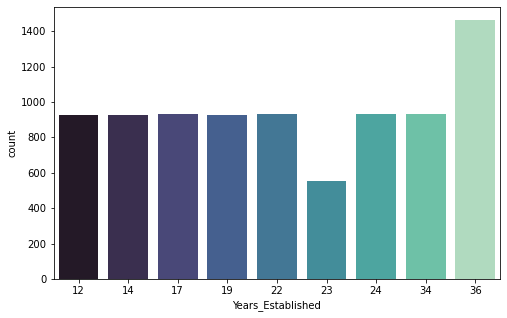

In [59]:
# Year Established
plt.figure(figsize=(8,5))
sn.countplot('Years_Established',data=train,palette='mako') 

The Outlets are more of established and running from 35 years.

# Bivariate Analysis

In [60]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Years_Established'],
      dtype='object')

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='Item_Outlet_Sales'>

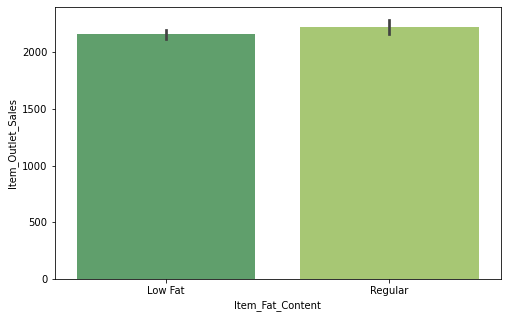

In [62]:
# Item Fat Content
plt.figure(figsize=(8,5))
sn.barplot('Item_Fat_Content','Item_Outlet_Sales',data=train,palette='summer')


Low Fat and Regular both are contributing equally to the revenue generation.

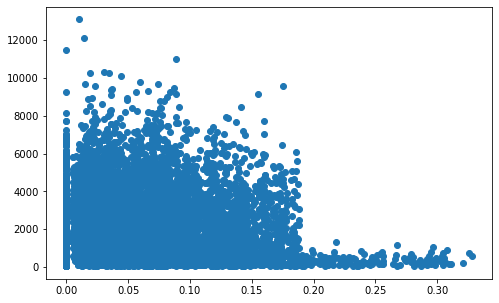

In [63]:
# Item Visibility to Item Outlet Sales
plt.figure(figsize=(8,5))
plt.scatter('Item_Visibility','Item_Outlet_Sales',data=train)


Item_Visibility has a minimum value of zero. This makes no practical sense because when a product is being sold in a store, the visibility cannot be 0.

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Item_Type'>

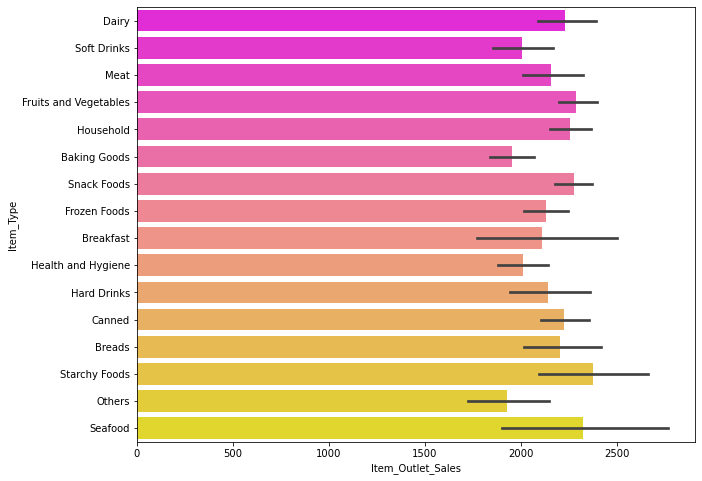

In [65]:
# Item Type to Item Outlet Sales
plt.figure(figsize=(10,8))
sn.barplot(y='Item_Type',x='Item_Outlet_Sales',data=train,palette='spring')


Fruits and Vegetables unit sold are high,however revenue generated by Seafood is much higher

Text(0, 0.5, 'Item Outlet Sales')

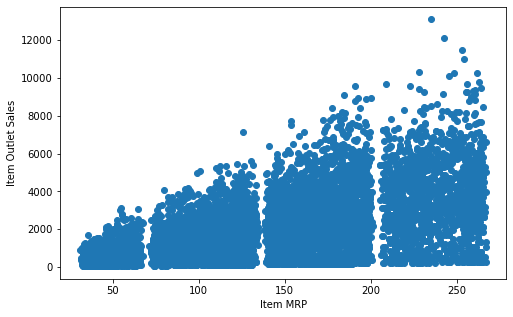

In [66]:
#Item MRP to Item Outlet Sales
plt.figure(figsize=(8,5))
plt.scatter(y='Item_Outlet_Sales',x='Item_MRP',data=train)
plt.xlabel('Item MRP')
plt.ylabel('Item Outlet Sales')

Item with higher MRP are sold maximum

<AxesSubplot:xlabel='Outlet_Size', ylabel='Item_Outlet_Sales'>

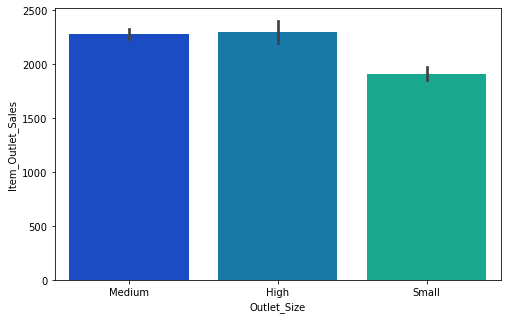

In [69]:
# Outlet Size to Item Outlet Sales
plt.figure(figsize=(8,5))
sn.barplot(x='Outlet_Size',y='Item_Outlet_Sales',data=train,palette='winter')

The Outlet Sales is maximum for Medium and High sized Outlets.
The Outlets we have is Medium and may be with High size Outlets can improve the Outlet Sales.

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='Item_Outlet_Sales'>

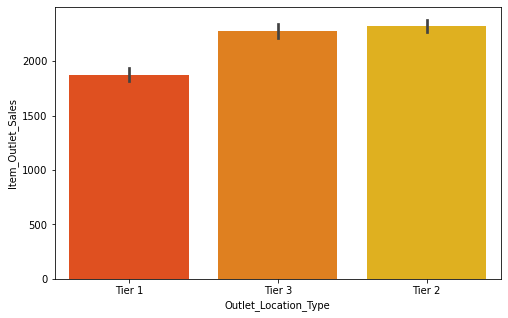

In [70]:
# Outlet Location to Item Outlet Sales
plt.figure(figsize=(8,5))
sn.barplot(x='Outlet_Location_Type',y='Item_Outlet_Sales',data=train,palette='autumn')

Tier 2 & 3 have more revenue generation power although we have maximum number at outlet in Tier 3 cities so it justify the number

<AxesSubplot:xlabel='Years_Established', ylabel='Item_Outlet_Sales'>

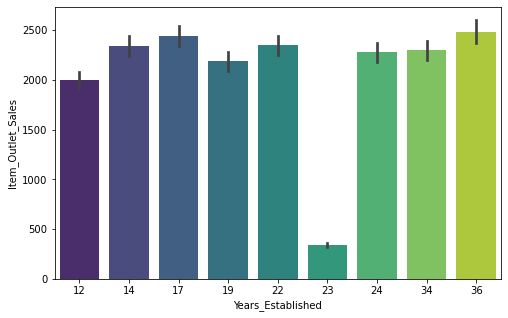

In [71]:
# Years Established to Item Outlet Sales
plt.figure(figsize=(8,5))
sn.barplot(x='Years_Established',y='Item_Outlet_Sales',data=train,palette='viridis')

1.It is quiet evident that Outlets established 35 years before is having good Sales margin.
2.We also have a outlet which was established before 22 years has the lowest sales margin, so established years wouldn't improve  the Sales unless the products are sold according to customer's interest.

# Multivariate Analysis

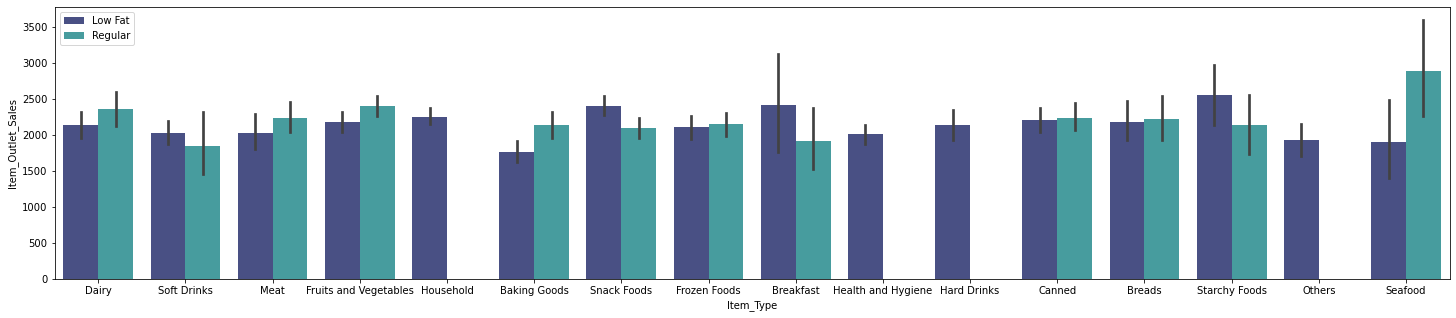

In [72]:
plt.figure(figsize=(25,5))
sn.barplot('Item_Type','Item_Outlet_Sales',hue='Item_Fat_Content',data=train,palette='mako')
plt.legend()

Mostly we have equal revenue generation from Fat and Regular Food Items.

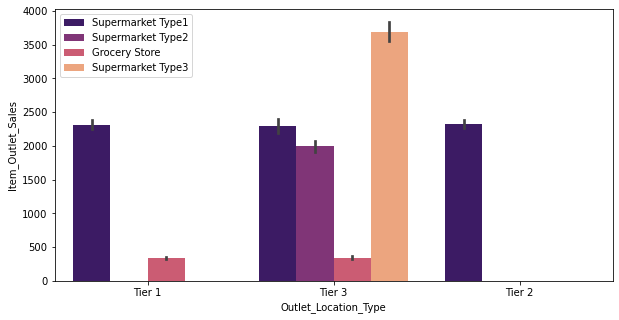

In [73]:
plt.figure(figsize=(10,5))
sn.barplot('Outlet_Location_Type','Item_Outlet_Sales',hue='Outlet_Type',data=train,palette='magma')
plt.legend()

The Tier-3 location type has all types of Outlet type and has high sales margin.

# Correlation matrix

<AxesSubplot:>

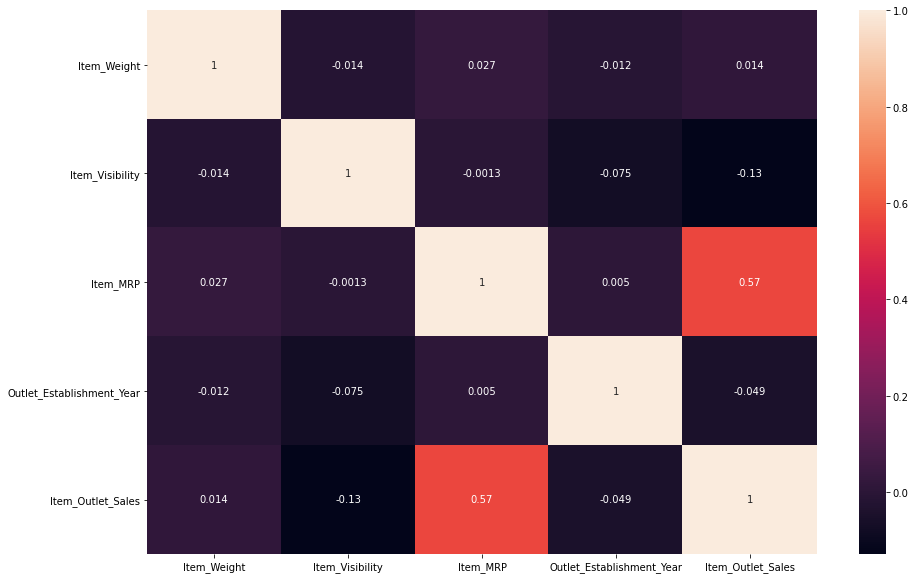

In [75]:
plt.figure(figsize=(15,10))
sn.heatmap(df.corr(),annot=True)

# Importing Label Encoder

In [76]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Years_Established
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,22
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,12
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,22
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,23
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,34


In [77]:
from sklearn.preprocessing import LabelEncoder

In [78]:
le = LabelEncoder()
var_mod = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type','Item_Type']

for i in var_mod:
    train[i] = le.fit_transform(train[i])
    
for i in var_mod:
    test[i] = le.fit_transform(test[i])

In [79]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Years_Established
0,FDA15,9.30,0,0.016047,4,249.8092,OUT049,1999,1,0,1,3735.1380,22
1,DRC01,5.92,1,0.019278,14,48.2692,OUT018,2009,1,2,2,443.4228,12
2,FDN15,17.50,0,0.016760,10,141.6180,OUT049,1999,1,0,1,2097.2700,22
3,FDX07,19.20,1,0.000000,6,182.0950,OUT010,1998,1,2,0,732.3800,23
4,NCD19,8.93,0,0.000000,9,53.8614,OUT013,1987,0,2,1,994.7052,34


In [80]:
train = train.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year'],axis=1)
test= test.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year'],axis=1)

In [81]:
train.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Outlet_Sales', 'Years_Established'],
      dtype='object')

In [96]:
x= train[['Item_Weight','Item_Fat_Content','Item_Visibility','Item_Type','Item_MRP','Outlet_Size','Outlet_Location_Type','Outlet_Type','Years_Established']]
y= train['Item_Outlet_Sales']

In [97]:
from sklearn.model_selection import train_test_split

In [98]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# Feature Scaling

In [99]:
features= ['Item_Weight','Item_Fat_Content','Item_Visibility','Item_Type','Item_MRP','Outlet_Size','Outlet_Location_Type','Outlet_Type','Years_Established']

#  Building Model

In [115]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso


from sklearn.model_selection  import cross_val_score as CVS
from sklearn import metrics

In [142]:
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score as R2

In [ ]:
def cross_val(model_name,model,x,y,cv):
    
    scores = CVS(model, x, y, cv=cv)
    print(f'{model_name} Scores:')
    for i in scores:
        print(round(i,2))
    print(f'Average {model_name} score: {round(scores.mean(),4)}')

Linear Regression

In [100]:
regressor_mlr = LinearRegression()


In [101]:
regressor_mlr.fit(x_train, y_train)


LinearRegression()

In [102]:
y_pred = regressor_mlr.predict(x_test)


In [124]:
#score variables
LR_MAE = round(MAE(y_test, y_pred),2)
LR_MSE = round(MSE(y_test, y_pred),2)
LR_R_2 = round(R2(y_test, y_pred),4)
LR_CS  = round(CVS(regressor_mlr, x, y, cv=5).mean(),4)

print(f" Mean Absolute Error: {LR_MAE}\n")
print(f" Mean Squared Error: {LR_MSE}\n")
print(f" R2 Score: {LR_R_2}\n")


 Mean Absolute Error: 913.96

 Mean Squared Error: 1432415.8

 R2 Score: 0.5106



2. Random Forest Regressor

In [111]:
regressor_rf = RandomForestRegressor(n_estimators=200,max_depth=5, min_samples_leaf=100,n_jobs=4,random_state=101)

In [112]:
regressor_rf.fit(x_train, y_train)

RandomForestRegressor(max_depth=5, min_samples_leaf=100, n_estimators=200,
                      n_jobs=4, random_state=101)

In [113]:
y_pred = regressor_rf.predict(x_test)

In [123]:
#score variables
RFR_MAE = round(MAE(y_test, y_pred),2)
RFR_MSE = round(MSE(y_test, y_pred),2)
RFR_R_2 = round(R2(y_test, y_pred),4)
RFR_CS  = round(CVS(regressor_rf, x, y, cv=5).mean(),4)



print(f" Mean Absolute Error: {RFR_MAE}\n")
print(f" Mean Squared Error: {RFR_MSE}\n")
print(f" R2 Score: {RFR_R_2}\n")


 Mean Absolute Error: 913.96

 Mean Squared Error: 1432415.8

 R2 Score: 0.5106



3.Lasso

In [118]:
regressor_ls = Lasso(alpha = 0.05)

In [119]:
regressor_ls.fit(x_train,y_train)

Lasso(alpha=0.05)

In [120]:
y_pred = regressor_ls.predict(x_test)

In [122]:
#score variables
LS_MAE = round(MAE(y_test, y_pred),2)
LS_MSE = round(MSE(y_test, y_pred),2)
LS_R_2 = round(R2(y_test, y_pred),4)
LS_CS  = round(CVS(regressor_ls, x, y, cv=5).mean(),4)

print(f" Mean Absolute Error: {LS_MAE}\n")
print(f" Mean Squared Error: {LS_MSE}\n")
print(f" R2 Score: {LS_R_2}\n")


 Mean Absolute Error: 913.96

 Mean Squared Error: 1432415.8

 R2 Score: 0.5106



4. Ridge Regressor

In [129]:
from sklearn.linear_model import Ridge

In [130]:
regressor_rd = Ridge(normalize=True)

In [131]:
regressor_rd.fit(x_train,y_train)


Ridge(normalize=True)

In [132]:
y_pred = regressor_ls.predict(x_test)

In [134]:
RD_MAE = round(MAE(y_test, y_pred),2)
RD_MSE = round(MSE(y_test, y_pred),2)
RD_R_2 = round(R2(y_test, y_pred),4)
RD_CS  = round(CVS(regressor_rd, x, y, cv=5).mean(),4)

print(f" Mean Absolute Error: {RD_MAE}\n")
print(f" Mean Squared Error: {RD_MSE}\n")
print(f" R2 Score: {RD_R_2}\n")


 Mean Absolute Error: 913.96

 Mean Squared Error: 1432415.8

 R2 Score: 0.5106



In [136]:
MAE= [LR_MAE,RFR_MAE,LS_MAE,RD_MAE]
MSE= [LR_MSE,RFR_MSE,LS_MSE,RD_MSE]
R_2= [LR_R_2,RFR_R_2,LS_R_2,RD_R_2]
Cross_score= [LR_CS,RFR_CS,LS_CS,RD_CS]

Models = pd.DataFrame({
    'Models': ["Linear Regression","Random Forest Regressor","Lasso Regressor","Ridge Regressor"],
    'MAE': MAE, 'MSE': MSE, 'R2':R_2, 'Cross Validation Score':Cross_score})
Models.sort_values(by='MAE', ascending=True)

,Models,MAE,MSE,R2,Cross Validation Score
0,Linear Regression,913.96,1432415.8,0.5106,0.5059
1,Random Forest Regressor,913.96,1432415.8,0.5106,0.5920
2,Lasso Regressor,913.96,1432415.8,0.5106,0.5059
3,Ridge Regressor,913.96,1432415.8,0.5106,0.3695


In [151]:
from sklearn.ensemble import GradientBoostingRegressor
model3= GradientBoostingRegressor()


In [152]:
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt

In [153]:
params = {'learning_rate': sp_randFloat(),'subsample'    : sp_randFloat(),'n_estimators' : sp_randInt(100, 1000),'max_depth'    : sp_randInt(4, 10)}

In [154]:
from sklearn.model_selection import RandomizedSearchCV
randm_search = RandomizedSearchCV(estimator=model3, param_distributions = params,
                               cv = 2, n_iter = 10, n_jobs=-1)
randm_search.fit(x_train, y_train)

RandomizedSearchCV(cv=2, estimator=GradientBoostingRegressor(), n_jobs=-1,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000000000EBAADC0>,
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000000000EB37DC0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000000000EB87D90>,
                                        'subsample': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000000000EB4DFD0>})

In [155]:
print("Best estimators",randm_search.best_estimator_)
print("Best score",randm_search.best_score_)
print("Best params",randm_search.best_params_)

Best estimators GradientBoostingRegressor(learning_rate=0.03569138564114116, max_depth=8,
                          n_estimators=124, subsample=0.8454397472763749)
Best score 0.5658187831116461
Best params {'learning_rate': 0.03569138564114116, 'max_depth': 8, 'n_estimators': 124, 'subsample': 0.8454397472763749}


In [156]:
model3=  GradientBoostingRegressor(learning_rate=0.0154291815347819, max_depth=9,
                          n_estimators=165, subsample=0.11550214721325958)

In [157]:
model3.fit(X_train,y_train)

GradientBoostingRegressor(learning_rate=0.0154291815347819, max_depth=9,
                          n_estimators=165, subsample=0.11550214721325958)

In [158]:
y_pred_train_model3 = model3.predict(X_train)
from sklearn.metrics import r2_score
R2 = r2_score(y_train,y_pred_train_model3)
print("r2 score is :",R2)

r2 score is : 0.158326611338091


In [159]:
print('MAE:', metrics.mean_absolute_error(y_train,y_pred_train_model3))
print('MSE:', metrics.mean_squared_error(y_train, y_pred_train_model3))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train_model3)))

MAE: 1242.925601773672
MSE: 2447592.2905038763
RMSE: 1564.478280611104


Random Forest Regressor are the Best Model.

# Saving the Model

In [164]:
import joblib
joblib.dump(reg,"bigmartsales.pkl")

['bigmartsales.pkl']